In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [196]:
df = pd.read_csv('ts_data_norm.csv')
df.head()

,subject_id,model,scalar,GM,WM,acc,caudate,thalamus,S1
0,MB5330,GQI,iso,"[0.0, 3.237536713463772, -4.365828664762832, 2...","[0.0, 3.678497547823259, -4.273564490966735, 2...","[0.0, 5.171918660570613, -2.7161408186441545, ...","[0.0, 5.239314733766029, -2.6709731092025697, ...","[0.0, 6.199364193693488, -2.810214934633278, 5...","[0.0, 3.9815209129574645, -3.8636694947374517,..."
1,AG6470,GQI,iso,"[0.0, -3.2433323053134617, 3.0084379142555515,...","[0.0, -2.5733788119060916, 3.2553228928382754,...","[0.0, -1.7146875404800228, 4.148937654329586, ...","[0.0, -1.4932737232157365, 1.7388280864117278,...","[0.0, -1.0678433621654901, 2.3053918185555116,...","[0.0, -4.421968005952376, 3.870045250418467, 1..."
2,AM5508,GQI,iso,"[0.0, -5.21274112859854, -10.916890424587333, ...","[0.0, -4.899505989037019, -9.70037126961142, -...","[0.0, -6.241731371064132, -9.347532116294799, ...","[0.0, -4.31977205368736, -7.522188687226955, -...","[0.0, -4.984968627902835, -10.445524369951626,...","[0.0, -6.243006476075625, -11.268375321055789,..."
3,AA5325,GQI,iso,"[0.0, -8.614194228809307, 2.6371288838790616, ...","[0.0, -9.045573495284652, 2.5564321137996244, ...","[0.0, -8.939764392087124, 2.2676333819881567, ...","[0.0, -7.61632967792966, 4.340068612937518, -3...","[0.0, -9.54458139907156, 2.618811506939463, -7...","[0.0, -8.908586212790029, 4.944266410160133, -..."
4,KS5471,GQI,iso,"[0.0, 1.4432237184613617, 6.77639127212176, 0....","[0.0, 2.247761131570135, 6.955287791276629, 1....","[0.0, 1.4087387349702674, 7.311893734160622, 2...","[0.0, 1.583085520682765, 5.305328803709916, -0...","[0.0, 4.3105624083730305, 6.046673485958941, 1...","[0.0, 0.716630710064727, 6.513534042665953, 0...."


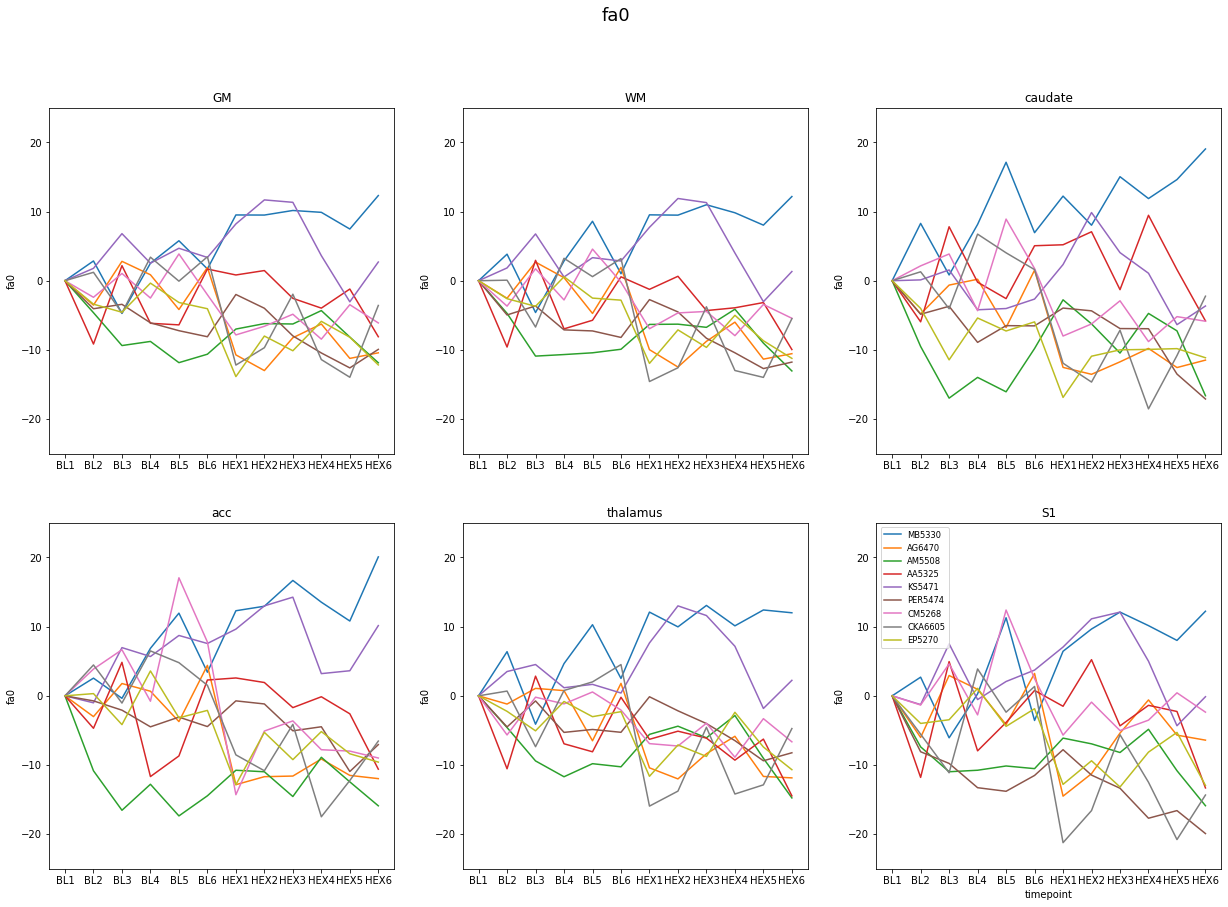

In [201]:
timepoints = ["BL1", "BL2", "BL3", "BL4", "BL5", "BL6", "HEX1", "HEX2", "HEX3", "HEX4", "HEX5", "HEX6"]
fig, axes = plt.subplots(2,3, figsize=(21,14))
# axes[1][2].set_visible(False)

# Choose scalar here
scalar = 'fa0'
scalar_df = df.loc[df.scalar == scalar]

rois = ['GM', 'WM', 'caudate', 'acc', 'thalamus', 'S1']

for i, ax in enumerate(fig.axes):
    if i < len(rois):
        roi = rois[i]
        if scalar=='rtop':
            ylim=[-10, 10]
        elif scalar=='md':
            ylim=[-10, 10]
        elif scalar=='iso':
            ylim=[-25, 25]
        elif scalar=='ISOVF':
            ylim=[-40, 40]
        elif scalar=='fa0':
            ylim=[-25, 25]
            
        for index, row in scalar_df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]   
            ax.plot(timepoints, data, label=row.subject_id)
            ax.set_ylabel(scalar)
            ax.set_ylim(ylim)
            ax.set_title(roi)

plt.xlabel('timepoint')
plt.legend(loc='upper left', fontsize='small')
fig.suptitle(scalar, fontsize=18)
fname="figs_norm/{}_timeseries.png".format(scalar)
plt.savefig(fname)
plt.show()